In [1]:
function accuracy()
    ac=600;
    return ac;
end
setprecision(accuracy());

In [2]:
function order()
    M=10;
    return M+1;
end

order (generic function with 1 method)

In [3]:
function steps()
    h = BigFloat(1)/BigFloat(100)
    return h;
end

steps (generic function with 1 method)

In [4]:
function JCh(k,i)
     
    k = BigFloat(k);
    i = BigFloat(i);
    s = BigFloat(1);
    if i < k/2
        i = k - i;
    end
    for j in range(k,i+1,step=-1)
        
        j1=BigFloat(j)
        s = s*j1/(j1-i)
        
    end
    
    return s
end

JCh (generic function with 1 method)

In [5]:
function DJCh()
    Cki = Array{BigFloat}(undef,order()-1,order()-1);
    for k in 1:order()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end

DJCh (generic function with 1 method)

In [6]:
function multi()
    S = Array{BigFloat}(undef,1,order());
    S[1] = BigFloat(1)
    
    for i in 1:order()-1
        S[i+1] = S[i]*steps()/BigFloat(i)
    end
    
    return S
end

multi (generic function with 1 method)

In [7]:
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 

Sumxyz (generic function with 1 method)

In [8]:
function Sumuvw(x,z,u,w,Cki)
    return sum(fdot(Cki[1:end],reverse!(w[1:end]),x[1:end])) + sum(fdot(Cki[1:end],reverse!(z[1:end]),u[1:end]))
end 

Sumuvw (generic function with 1 method)

In [9]:
"""function Sumuvw(x,z,u,w,Cki)
    #println(convert(Float16,(log10(abs(sum(Cki.*x.*reverse!(w)))))))
    return sum(Cki.*u.*reverse!(z)) + sum(Cki.*x.*reverse!(w))
end 
"""

"function Sumuvw(x,z,u,w,Cki)\n    #println(convert(Float16,(log10(abs(sum(Cki.*x.*reverse!(w)))))))\n    return sum(Cki.*u.*reverse!(z)) + sum(Cki.*x.*reverse!(w))\nend \n"

In [10]:
function Talor(x,y,z,u,v,w,Cki)
    for k in 1:order()-1
        
        #println(k,": ",convert.(Float16,log10.([abs(x[k]),abs(y[k]),abs(z[k])])))
        #println(convert(Float16,(log10(abs(w[k])))))
        #println("====")
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
        
        u[k+1] = a*(v[k] - u[k])
        v[k+1] = (c-a)*u[k] - Sumuvw(x[1:k],z[1:k],u[1:k],w[1:k],Cki[k,1:k]) + c*v[k]
        w[k+1] = Sumuvw(x[1:k],y[1:k],u[1:k],v[1:k],Cki[k,1:k]) - b*w[k]
    end
    
    return x,y,z,u,v,w
end

Talor (generic function with 1 method)

In [11]:
function Iteration(x,y,z,u,v,w,Cki)
    
    for st in 1:Times
    
        x,y,z,u,v,w = Talor(x,y,z,u,v,w,Cki)
        
        x[1] = sum(x[1:end].*Dmulti[1:end])
        y[1] = sum(y[1:end].*Dmulti[1:end])
        z[1] = sum(z[1:end].*Dmulti[1:end])
        
        u[1] = sum(u[1:end].*Dmulti[1:end])
        v[1] = sum(v[1:end].*Dmulti[1:end])
        w[1] = sum(w[1:end].*Dmulti[1:end])
    
        Lorenz[st,:] = [x[1],y[1],z[1]] 
        Lorenzf[st,:] = convert.(Float32,Lorenz[st,:])
        
        Ep[st] = (log10(abs(u[1]))+log10(abs(v[1]))+log10(abs(w[1])))/3 
      
        if mod(st,5000) == 0
            println(st,") ","time=",convert(Float16,st*steps()),": ",convert(Float16,Ep[st])," ",Lorenzf[st,:])
        end
    end
    
    return Lorenz,Ep
    
end

Iteration (generic function with 1 method)

In [12]:
Times = 100*500;      

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order())
y = Array{BigFloat}(undef,order())
z = Array{BigFloat}(undef,order())
u = Array{BigFloat}(undef,order())
v = Array{BigFloat}(undef,order())
w = Array{BigFloat}(undef,order())
Lorenz = Array{BigFloat}(undef,Times,3);
HH = Array{BigFloat}(undef,Times,3);
Ep = Array{BigFloat}(undef,Times,1);
Lorenzf = Array{Float32}(undef,Times,3);
Dmulti = Array{BigFloat}(undef,1,order());
Cki = Array{BigFloat}(undef,order()-1,order()-1);

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

mep = BigFloat(10)^BigFloat(-270)
u[1] = mep
v[1] = mep
w[1] = mep

Cki = DJCh();
Dmulti = multi();

In [13]:
HH,Ep = Iteration(x,y,z,u,v,w,Cki);

5000) time=50.0: -222.5 Float32[-3.1058688, -3.765377, 12.589342]
10000) time=100.0: -174.2 Float32[6.474865, 6.7761593, 15.548651]
15000) time=150.0: -120.4 Float32[-7.715167, -10.2724905, 8.244475]
20000) time=200.0: -70.9 Float32[-6.5037785, -7.4179564, 13.585431]
25000) time=250.0: -22.72 Float32[-4.16526, -4.5683846, 12.723345]
30000) time=300.0: 28.16 Float32[9.000575, 7.5056515, 20.467762]
35000) time=350.0: 78.1 Float32[2.0423982, 3.3327339, 16.821003]
40000) time=400.0: 129.1 Float32[2.4904697, 3.7070324, 19.036287]
45000) time=450.0: 181.0 Float32[-0.5751219, -0.77450407, 6.6686444]
50000) time=500.0: 232.6 Float32[7.4809494, 9.963715, 8.16257]


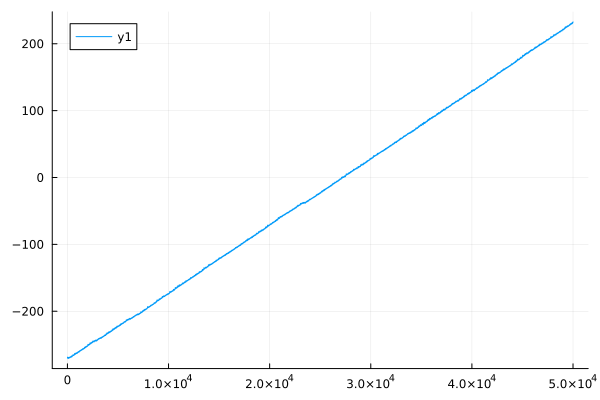

In [14]:
using Plots; 
plot(1:Times,Ep[1:end])

In [15]:
#write
function Wfile(AT,BE,Times)
#change name--------------------------------------------
    XLSX.openxlsx("CNEP_Chen.xlsx", mode="w") do xf
#-------------------------------------------------------
        sheet = xf[1]
        XLSX.rename!(sheet, "new_sheet")
#change location----------------------------------------
        sheet["A1"] = "T"
        sheet["B1"] = "Ep"
        sheet["A2",dim=1] = AT[1:end]
        sheet["B2",dim=1] = BE[1:end]
#-------------------------------------------------------
    end
end
#-----------------------------------------------------------------------------
using XLSX
#time-----------------------------------------------------
AT=Array{Float32}(undef,Times)
for i in 1:Times
    AT[i]=i*steps()
end
#time-----------------------------------------------------
BE=Ep[1:end];
#--------------------------------------------------------
Wfile(AT,BE,Times);

In [16]:
sk = 0
sn = 0
for i in range(5000,Times,step=1000)
    sk = sk + (Ep[i]-Ep[1])/((i-1)*steps())
    sn = sn + 1
end
sk/sn

0.98936262997999772437845089281496185124427785366730771770735543059761154148903971914362626351788650279480743377013220591911081059495571203615946917208757586727110123171088691190147639

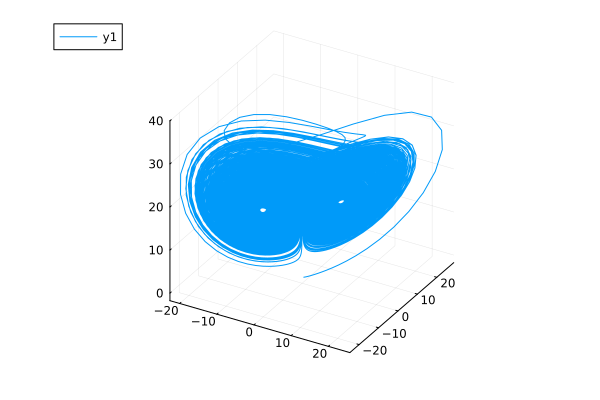

In [17]:
plot(HH[1:end,1],HH[1:end,2],HH[1:end,3])

In [18]:
Tinf = 500
ep = BigFloat(10)^(-35-1.001*Tinf)

3.1622776601683793319988935444327185337195551393252168268575048527925944386392382213442481083793002951873472841528400551485488560304538800146905195967001539033449216571792599406591499e-536

In [19]:
function steps2()
    h = BigFloat(1)/BigFloat(100)
    return h;
end
function order2()
    M=450;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    
    end
    
    return x,y,z
end

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);


x,y,z = Talor2(x,y,z,Cki)
m = x[end]*Dmulti[end] + y[end]*Dmulti[end] +z[end]*Dmulti[end]
println(convert(Float16,log10(abs(m))))

-576.5


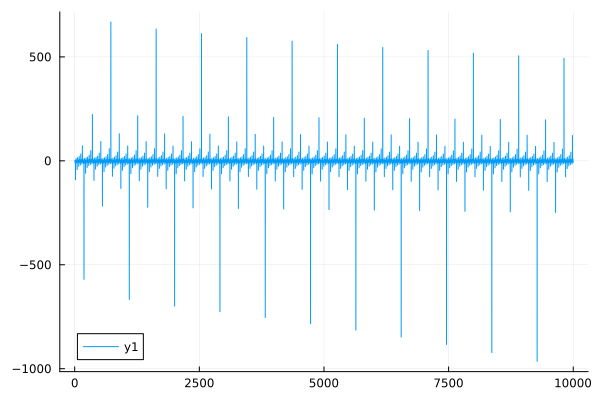

In [20]:
#收敛半径R
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(10000)
    return h;
end
function order2()
    M=10000;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = -y[k] - z[k]
        y[k+1] = x[k] + a*y[k]
        z[k+1] = b - c*z[k] + Sumxyz(x[1:k],z[1:k],Cki[k,1:k])
    
    end
    
    return x[2:end]./x[1:end-1],y[2:end]./y[1:end-1],z[2:end]./z[1:end-1]
end

a =  BigFloat(3)/BigFloat(20);
b =  BigFloat(2)/BigFloat(10);
c =  BigFloat(10)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2()-1)
y1 = Array{BigFloat}(undef,order2()-1)
z1 = Array{BigFloat}(undef,order2()-1)
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = BigFloat(1); 
y[1] = BigFloat(2); 
z[1] = BigFloat(3);

for i in 1:order2()-1
    Shun[i] = i+1
end

x1,y1,z1 = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
y1 = y1[1:end]./Shun[1:end]
using Plots; 
plot(1:order2()-1,y1)

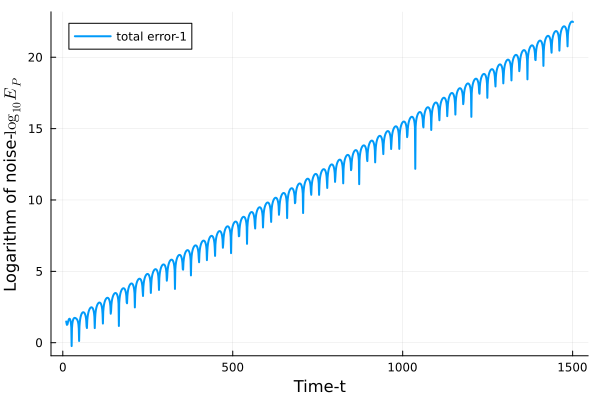

In [10]:
#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(5)
    return h;
end
function order2()
    M=1500;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    
    end
    
    return x,y,z
end

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

for i in 1:order2()-1
    Shun[i] = i+1
end

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]
using Plots;
using LaTeXStrings
#plot(10:order2(),log10.(abs.(x1[10:end])))
ld=2
lpha=1
plot(xlabel = "Order-M", ylabel = L"Logarithm of noise-${{\log}_{10}}{{E}_{P}}$")
#plot!(size = (600,400))
#clr = palette(:PiYG_4)
plot!(10:order2(),log10.(abs.(x1[10:end])),
    linealpha = lpha,
    linewidth = ld,
    #linecolor = clr[1],
    label = "total error-1" 
)

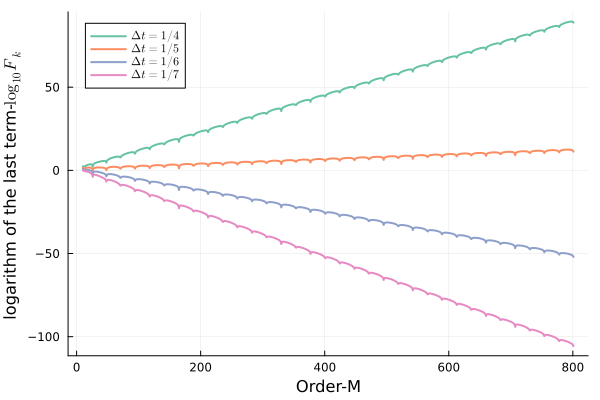

In [20]:
#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(4)
    return h;
end
function order2()
    M=800;
    return M+1;
end
function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    
    end
    
    return x,y,z
end

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

for i in 1:order2()-1
    Shun[i] = i+1
end

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]
using Plots;
using LaTeXStrings
#plot(10:order2(),log10.(abs.(x1[10:end])))
ld=2
lpha=1
plot(xlabel = "Order-M", ylabel = L"logarithm of the last term-${{\log}_{10}}{{F}_{k}}$")
#plot!(size = (600,400))
clr = palette(:Set2_4)
plot!(10:order2(),log10.(abs.(x1[10:end])),
    linealpha = lpha,
    linewidth = ld,
    linecolor = clr[1],
    label = L"\Delta {{t}}=1/4" 
)


#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(5)
    return h;
end

function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    
    end
    
    return x,y,z
end

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

for i in 1:order2()-1
    Shun[i] = i+1
end

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]

plot!(10:order2(),log10.(abs.(x1[10:end])),
    linealpha = lpha,
    linewidth = ld,
    linecolor = clr[2],
    label = L"\Delta {{t}}=1/5" 
)


#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(6)
    return h;
end

function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    
    end
    
    return x,y,z
end

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

for i in 1:order2()-1
    Shun[i] = i+1
end

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]
using Plots;
using LaTeXStrings
plot!(10:order2(),log10.(abs.(x1[10:end])),
    linealpha = lpha,
    linewidth = ld,
    linecolor = clr[3],
    label = L"\Delta {{t}}=1/6" 
)

#余项分析
fdot(x,y,z) = @. x*y*z
function Sumxyz(x,y,Cki)
    return sum(fdot(Cki[1:end],reverse!(x[1:end]),y[1:end]))
end 
function steps2()
    h = BigFloat(1)/BigFloat(7)
    return h;
end

function DJCh2()
    Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
    for k in 1:order2()-1
        for j in 1:k
            Cki[k,j] = 1
        end
    end
    
    for k in 2:order2()-2
        for i in 1:k-1
           Cki[k+1,i+1] = Cki[k,i] + Cki[k,i+1]
        end
    end
    return Cki
end
function multi2()
    S = Array{BigFloat}(undef,1,order2());
    S[1] = BigFloat(1)
    
    for i in 1:order2()-1
        S[i+1] = S[i]*steps2()/BigFloat(i)
    end
    
    return S
end
function Talor2(x,y,z,Cki)
    for k in 1:order2()-1
        
        x[k+1] = a*(y[k] - x[k])
        y[k+1] = (c-a)*x[k] - Sumxyz(x[1:k],z[1:k],Cki[k,1:k]) + c*y[k]
        z[k+1] = Sumxyz(x[1:k],y[1:k],Cki[k,1:k]) - b*z[k]
    
    end
    
    return x,y,z
end

a =  BigFloat(40);
b =  BigFloat(3);
c =  BigFloat(28)

x = Array{BigFloat}(undef,order2())
y = Array{BigFloat}(undef,order2())
z = Array{BigFloat}(undef,order2())
x1 = Array{BigFloat}(undef,order2())
y1 = Array{BigFloat}(undef,order2())
z1 = Array{BigFloat}(undef,order2())
Shun = Array{BigFloat}(undef,order2()-1)
Dmulti = Array{BigFloat}(undef,1,order2());
Cki = Array{BigFloat}(undef,order2()-1,order2()-1);
Cki = DJCh2();
Dmulti = multi2();

x[1] = -BigFloat(1)/BigFloat(10); 
y[1] = BigFloat(1)/BigFloat(2); 
z[1] = -BigFloat(6)/BigFloat(10);

for i in 1:order2()-1
    Shun[i] = i+1
end

x,y,z = Talor2(x,y,z,Cki);
#println(convert(Float16,log10(abs(m))))
x1 = x[1:end].*Dmulti[1:end]
y1 = y[1:end].*Dmulti[1:end]
z1 = z[1:end].*Dmulti[1:end]
using Plots;
using LaTeXStrings
plot!(10:order2(),log10.(abs.(x1[10:end])),
    linealpha = lpha,
    linewidth = ld,
    linecolor = clr[4],
    label = L"\Delta {{t}}=1/7" 
)